Exploring Dandiset 000690: Allen Institute OpenScope - Vision to Hippocampus Project

**Important Note:** This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results.

## Overview of the Dandiset
This notebook explores Dandiset 000690, which contains data from the Allen Institute OpenScope - Vision to Hippocampus project. The project investigates how neural representations of visual stimuli evolve from the LGN through V1 and hippocampal regions. The dataset includes extracellular electrophysiology recordings and eye-tracking data from mice presented with simple and natural visual stimuli.

You can find the Dandiset at: [https://dandiarchive.org/dandiset/000690](https://dandiarchive.org/dandiset/000690)

## Notebook Overview
This notebook will cover the following:
1.  Loading the Dandiset metadata using the DANDI API.
2.  Exploring eye-tracking data, including eye position and blink detection.
3.  Analyzing running wheel data to understand the mouse's behavior during the experiments.

## Required Packages
The following packages are required to run this notebook:
-   pynwb
-   h5py
-   remfile
-   matplotlib
-   numpy
-   seaborn

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

## Loading the Dandiset using the DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

Found 156 assets in the dataset

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049.nwb


## Loading and Exploring an NWB File
We will load an NWB file from the Dandiset and explore its contents. This will give us an overview of the types of data available and how to access them. We will load the file `sub-692072/sub-692072_ses-1298465622.nwb`.

To ensure consistent access, we will use the DANDI API to get the download URL for the file.

In [3]:
# Load the NWB file
asset_id = "fbcd4fe5-7107-41b2-b154-b67f783f23dc"
asset = dandiset.get_asset(asset_id)
nwb_file_url = asset.download_url

remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

# Print basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: Data and metadata for an Ecephys session
Identifier: 1298465622
Session start time: 2023-09-21 00:00:00-07:00


## Exploring Eye-Tracking Data
The NWB file contains eye-tracking data, which can be used to analyze the mouse's gaze behavior during the experiments. We will load the eye position data and analyze it.

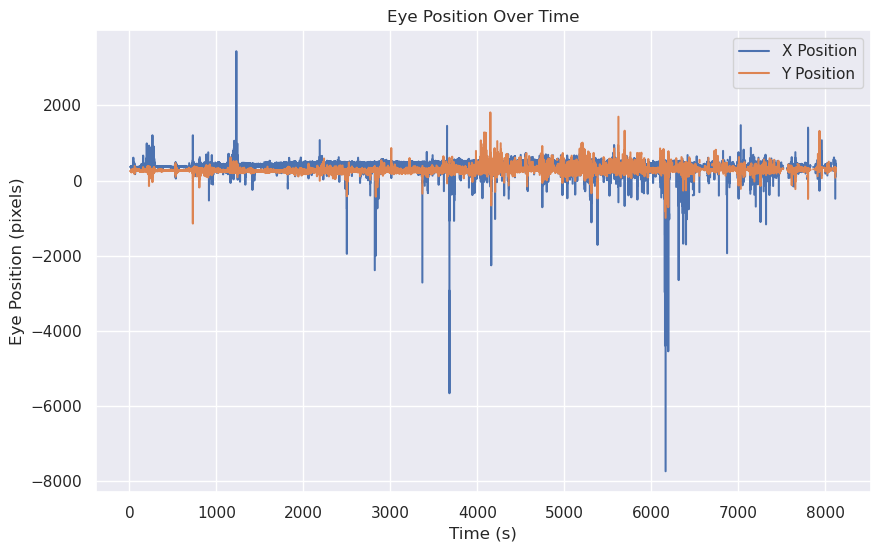

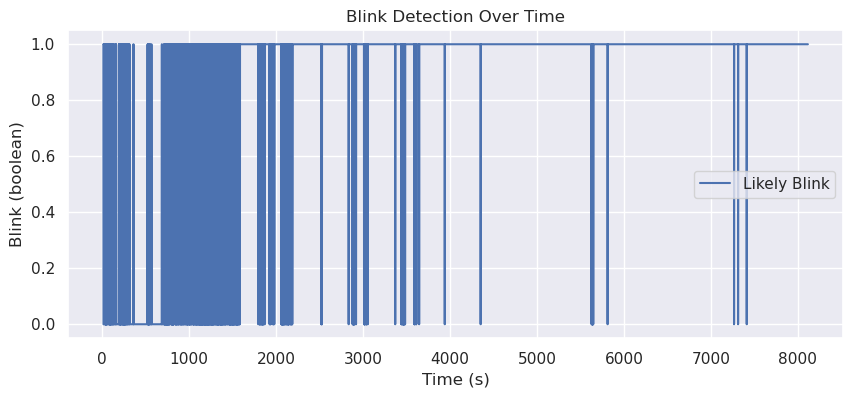

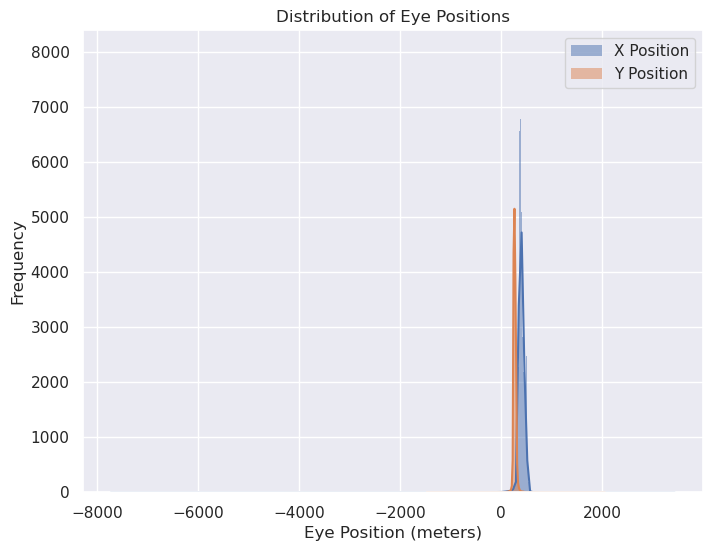

In [4]:
# Access EyeTracking data
eye_tracking = nwb.acquisition["EyeTracking"]
eye_position = eye_tracking.spatial_series["eye_tracking"].data[:]
eye_timestamps = eye_tracking.spatial_series["eye_tracking"].timestamps[:]
likely_blink = eye_tracking.likely_blink.data[:]

# Plot eye position
plt.figure(figsize=(10, 6))
plt.plot(eye_timestamps, eye_position[:, 0], label="X Position")
plt.plot(eye_timestamps, eye_position[:, 1], label="Y Position")
plt.xlabel("Time (s)")
plt.ylabel("Eye Position (pixels)")
plt.title("Eye Position Over Time")
plt.legend()
plt.show()

# Plot blink data
plt.figure(figsize=(10, 4))
plt.plot(eye_timestamps, likely_blink, label="Likely Blink")
plt.xlabel("Time (s)")
plt.ylabel("Blink (boolean)")
plt.title("Blink Detection Over Time")
plt.legend()
plt.show()

# Plot histogram of eye position data
plt.figure(figsize=(8, 6))
sns.histplot(eye_position[:, 0], kde=True, label="X Position")
sns.histplot(eye_position[:, 1], kde=True, label="Y Position")
plt.xlabel("Eye Position (meters)")
plt.ylabel("Frequency")
plt.title("Distribution of Eye Positions")
plt.legend()
plt.show()

The eye position data shows the X and Y coordinates of the mouse's eye over time. Both X and Y positions have some large outliers. The blink detection data confirms that the mouse blinked frequently at the beginning of the recording, which could be causing some of the artifacts in the eye position data.

## Exploring Running Wheel Data
The NWB file also contains data from a running wheel, which can be used to analyze the mouse's movement behavior during the experiments. We will load the running speed data and analyze it.

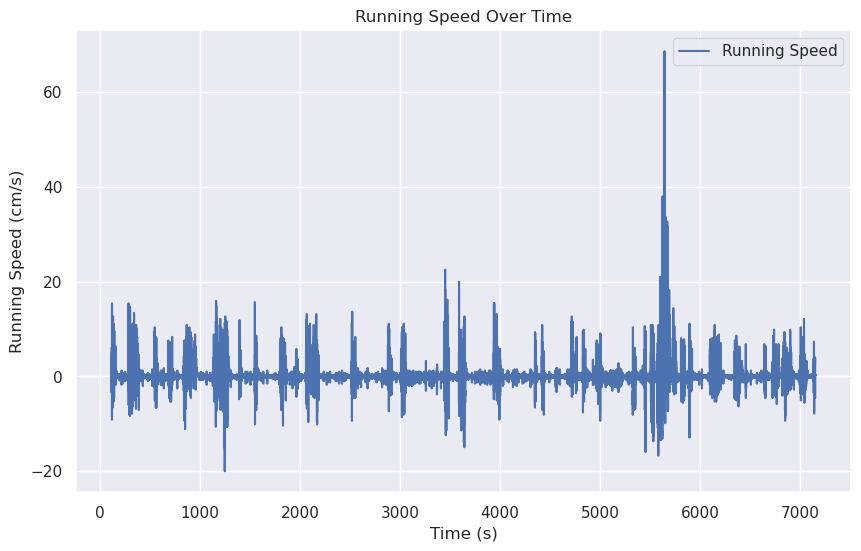

In [5]:
# Access running wheel data
running_speed = nwb.processing["running"].data_interfaces["running_speed"].data[:]
running_speed_timestamps = nwb.processing["running"].data_interfaces["running_speed"].timestamps[:]

# Plot running speed
plt.figure(figsize=(10, 6))
plt.plot(running_speed_timestamps, running_speed, label="Running Speed")
plt.xlabel("Time (s)")
plt.ylabel("Running Speed (cm/s)")
plt.title("Running Speed Over Time")
plt.legend()
plt.show()

The running speed data shows the mouse's running speed over time. The running speed generally varies between 0 cm/s and 20 cm/s, with a few notable deflections into negative values, and spikes, including one near 5700 seconds that reaches around 70 cm/s. The negative values are likely artifacts of the measurement.

## Summary and Future Directions
This notebook has demonstrated how to load and explore data from Dandiset 000690, including eye-tracking data and running wheel data. Possible future directions for analysis include:
-   Analyzing the relationship between eye-tracking data and running wheel data.
-   Investigating the neural activity recorded in the dataset and how it relates to the mouse's behavior and the presented stimuli.
-   Exploring the stimulus information in the NWB file to understand what stimuli were presented to the mouse during the experiments.